In [4]:
!python3 -m pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 7.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel('data-throughput.xlsx')

In [32]:
df

,Num switches,other switches per switch,servers per switch,Num servers,unif,random,gaussian,zipf,rand perm mtrx
0,4,3,2,8,14.000000,11.577012,9.160791,9.622353,3.771236
1,8,3,2,16,15.000000,13.418781,14.388029,10.469325,2.666667
2,16,3,2,32,11.809524,11.680805,13.877285,11.614027,2.121320
3,24,3,2,48,15.666667,15.563927,15.016112,12.340526,2.309401
4,32,3,2,64,19.764706,19.768461,19.694474,12.870390,2.500000
5,40,3,2,80,19.799499,19.684202,19.065636,13.287324,3.111051
6,48,3,2,96,24.000000,25.105233,24.701109,13.631047,2.449490
7,64,3,2,128,42.333333,39.713085,41.215268,14.177927,3.624890
8,80,3,2,160,43.752345,43.651710,42.833106,14.605232,3.425801
9,24,3,4,96,15.833333,15.789679,14.806560,11.683187,1.264253


In [33]:
df.columns

Index(['Num switches', 'other switches per switch', 'servers per switch',
       'Num servers', 'unif', 'random', 'gaussian', 'zipf', 'rand perm mtrx'],
      dtype='object')

In [34]:
basedf = df[df[df.columns[2]] == 2]
basedf

,Num switches,other switches per switch,servers per switch,Num servers,unif,random,gaussian,zipf,rand perm mtrx
0,4,3,2,8,14.000000,11.577012,9.160791,9.622353,3.771236
1,8,3,2,16,15.000000,13.418781,14.388029,10.469325,2.666667
2,16,3,2,32,11.809524,11.680805,13.877285,11.614027,2.121320
3,24,3,2,48,15.666667,15.563927,15.016112,12.340526,2.309401
4,32,3,2,64,19.764706,19.768461,19.694474,12.870390,2.500000
5,40,3,2,80,19.799499,19.684202,19.065636,13.287324,3.111051
6,48,3,2,96,24.000000,25.105233,24.701109,13.631047,2.449490
7,64,3,2,128,42.333333,39.713085,41.215268,14.177927,3.624890
8,80,3,2,160,43.752345,43.651710,42.833106,14.605232,3.425801
12,24,4,2,48,33.422222,34.106966,32.097377,16.454034,4.618802


In [35]:
x = basedf['Num servers']
y = [0] * 5
for i in range(5):
    y[i] = basedf[basedf.columns[i+4]]

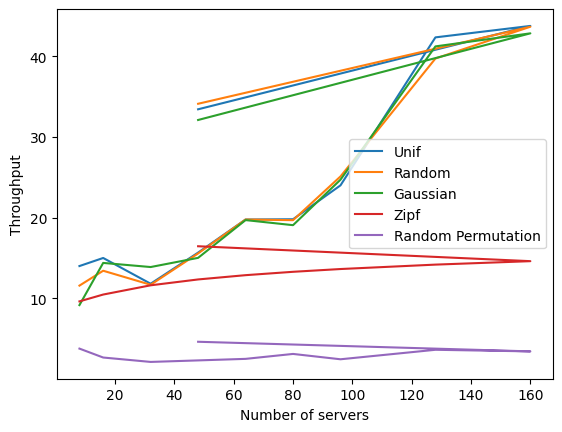

In [36]:
plt.plot(x, y[0], label="Unif")
plt.plot(x, y[1], label="Random")
plt.plot(x, y[2], label="Gaussian")
plt.plot(x, y[3], label="Zipf")
plt.plot(x, y[4], label="Random Permutation")
plt.legend()
plt.xlabel("Number of servers")
plt.ylabel("Throughput")
plt.show()

In [47]:
basedf = df[(df[df.columns[1]] == 3) & (df[df.columns[0]] == 24)]
print(basedf.dtypes)
basedf = basedf.sort_values(by='servers per switch')
basedf

Num switches                   int64
other switches per switch      int64
servers per switch             int64
Num servers                    int64
unif                         float64
random                       float64
gaussian                     float64
zipf                         float64
rand perm mtrx               float64
dtype: object


,Num switches,other switches per switch,servers per switch,Num servers,unif,random,gaussian,zipf,rand perm mtrx
11,24,3,1,24,17.250000,18.722748,18.801124,13.674994,3.265986
3,24,3,2,48,15.666667,15.563927,15.016112,12.340526,2.309401
10,24,3,3,72,16.228571,16.103175,15.462434,11.889109,1.697056
9,24,3,4,96,15.833333,15.789679,14.806560,11.683187,1.264253


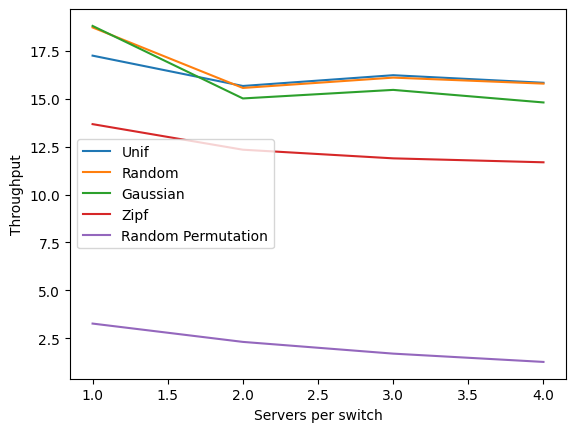

In [51]:
x = basedf['servers per switch']
y = [0] * 5
for i in range(5):
    y[i] = basedf[basedf.columns[i+4]]
plt.plot(x, y[0], label="Unif")
plt.plot(x, y[1], label="Random")
plt.plot(x, y[2], label="Gaussian")
plt.plot(x, y[3], label="Zipf")
plt.plot(x, y[4], label="Random Permutation")
plt.legend()
plt.xlabel("Servers per switch")
plt.ylabel("Throughput")
plt.show()